### 1. officials that share common membership in groups like federalist society and heritage foundation

In [1]:
import csv
import networkx as nx
import collections

# Undirected or Directed graph

#G = nx.Graph()
G = nx.DiGraph() 

In [2]:
# Add Nodes Persone

# used data > all_noemploy.csv

with open('all_noemploy.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    

    #american_center_for_law_and_justice	christian_legal_society_bar_association	federalist_society	heritage_foundation	national_rifle_association_tie	republican_national_lawyers_association_tie
    
    # add nodes with atributes from table
    id = 0
    for row in reader:
        G.add_node(id,
                   type = row['source'],
                   person = row['person'],
                   name = row['person'],
                   position_current = row['position_current'],
                   law = row['law'],
                   law_conservative_score = row['law_conservative_score'],
                   law_rank = row['law_rank'],
                   political_affiliation = row['political_affiliation'],
                  
                   #value of memberships
                   american_center_for_law_and_justice = row['american_center_for_law_and_justice'],
                   christian_legal_society_bar_association = row['christian_legal_society_bar_association'],
                   federalist_society = row['federalist_society'],
                   heritage_foundation = row['heritage_foundation'],
                   national_rifle_association_tie = row['national_rifle_association_tie'],
                   republican_national_lawyers_association_tie = row['republican_national_lawyers_association_tie']
                  )
        
        id+=1

In [3]:
#add nodes organisation

listOrganisations = ['american_center_for_law_and_justice',
                     'christian_legal_society_bar_association',
                     'federalist_society',
                     'heritage_foundation',
                     'national_rifle_association_tie',
                     'republican_national_lawyers_association_tie']

id=300
for org in listOrganisations:
    G.add_node(id,name = org,org_name = org, type='org')
    id +=1

In [4]:
#check optional
for node in G.nodes.data():
    if node[1]['type'] == 'org':
        print(node)

(300, {'name': 'american_center_for_law_and_justice', 'org_name': 'american_center_for_law_and_justice', 'type': 'org'})
(301, {'name': 'christian_legal_society_bar_association', 'org_name': 'christian_legal_society_bar_association', 'type': 'org'})
(302, {'name': 'federalist_society', 'org_name': 'federalist_society', 'type': 'org'})
(303, {'name': 'heritage_foundation', 'org_name': 'heritage_foundation', 'type': 'org'})
(304, {'name': 'national_rifle_association_tie', 'org_name': 'national_rifle_association_tie', 'type': 'org'})
(305, {'name': 'republican_national_lawyers_association_tie', 'org_name': 'republican_national_lawyers_association_tie', 'type': 'org'})


In [5]:
#add edges between persones & org

for node in G.nodes.data():
    if node[1]['type'] == 'prosecutor':
        
        if node[1]['american_center_for_law_and_justice'] != 'NA':
            G.add_edge(node[0],300)
        if node[1]['christian_legal_society_bar_association'] != 'NA':
            G.add_edge(node[0],301)
        if node[1]['federalist_society'] != 'NA':
            G.add_edge(node[0],302)
        if node[1]['heritage_foundation'] != 'NA':
            G.add_edge(node[0],303)
        if node[1]['national_rifle_association_tie'] != 'NA':
            G.add_edge(node[0],304)
        if node[1]['republican_national_lawyers_association_tie'] != 'NA':
            G.add_edge(node[0],305)
            
          


In [6]:
#check optional
G.edges

OutEdgeView([(6, 300), (6, 302), (6, 304), (8, 302), (10, 302), (14, 302), (14, 303), (17, 302), (20, 302), (21, 302), (22, 302), (29, 302), (30, 302), (37, 302), (38, 302), (42, 302), (42, 305), (51, 304), (52, 302), (55, 302), (56, 302), (60, 302), (64, 304), (67, 302), (69, 304), (70, 302), (71, 301), (71, 302), (72, 302), (75, 302), (76, 302), (76, 305), (81, 302)])

In [7]:
#Analise for predecessors  add to every node value 'predecessors'
for node in G.nodes.data():
    G.nodes[node[0]]['predecessors'] = len(list(G.predecessors(node[0])))

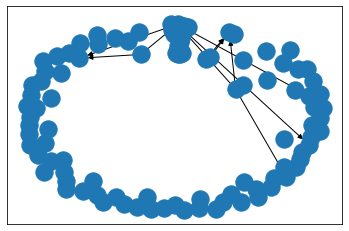

In [8]:
#check net
pos=nx.spring_layout(G)
nx.draw_networkx(G,pos,with_labels=False)

In [9]:
#convert net for Gephi
nx.write_gexf(G, "1_common_membership.gexf")